In [10]:
import numpy as np
import numpy.random as random
import scipy as sp
#import modin.pandas as pd #多核處裡
import pandas as pd 
from pandas import Series,DataFrame

import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import ast
import csv

import sklearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.utils import resample
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

%precision 3

'%.3f'

In [19]:
#該資料已進行遺漏值填補但未進行oversampling
df = pd.read_csv(r'C:\Users\kevin\fintech_project\train.csv',engine='python')
df.shape
df2 = pd.read_csv('test.csv',engine='python')

In [20]:
df['Y'].value_counts()

0    29805
1      195
Name: Y, dtype: int64

In [21]:
y_train = df['Y']
x_train = df.drop('Y',axis=1)

In [22]:
df_majority = df[df.Y==0]
df_minority = df[df.Y==1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=29805, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [23]:
df_upsampled = df_upsampled.reset_index(drop = True)

In [24]:
y_res = df_upsampled['Y']
x_res = df_upsampled.drop(['Y'],axis = 1)

In [25]:
def getPrecision(x,y,propotion,y_num,estimator):
        proba = estimator.predict_proba(x)[:,1]#得到預測機率
        rankIndex = np.flip(np.argsort(proba))
        num = int(len(rankIndex)*propotion)    
        rankIndex = rankIndex[:num]#取得風險機率最高前5%的資料其在原本df的index

        fraudCount = 0
        for key in rankIndex:
            if(y[key] == 1):#如果它真的是詐欺
                fraudCount+=1

        result = fraudCount/y_num
    
        return result

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

start = datetime.datetime.now()
gbdt = GradientBoostingClassifier()
gbdt.fit(x_res,y_res)

start = datetime.datetime.now()
feats = pd.Series(data=gbdt.feature_importances_, index=x_res.columns)
end = datetime.datetime.now()
feats = feats.sort_values(ascending=False)
print("running time : ",end-start)
feats[:10]

running time :  0:00:00.001009


Y1_CNT_HIS              0.084173
INVALID_CNT_RATE_12M    0.076151
Y_CNT_HIS               0.073549
FAIL_CNT_HIS            0.049804
SIN_AFYP_RATE           0.033358
Y_RECENCY_HIS12         0.024665
selfpay_RATE            0.024653
DISCON_CNT_RATE         0.018725
Y2_CNT_HIS              0.017772
TERMINATION_CNT_HIS     0.016700
dtype: float64

In [27]:
feats[:20]

Y1_CNT_HIS                 0.084173
INVALID_CNT_RATE_12M       0.076151
Y_CNT_HIS                  0.073549
FAIL_CNT_HIS               0.049804
SIN_AFYP_RATE              0.033358
Y_RECENCY_HIS12            0.024665
selfpay_RATE               0.024653
DISCON_CNT_RATE            0.018725
Y2_CNT_HIS                 0.017772
TERMINATION_CNT_HIS        0.016700
total_aum                  0.016017
AVG_AFYP_REG               0.015457
ADDRESS_2_CUST_RATE        0.015038
TERMINATION_CNT_RATE       0.012959
ST_INVALID_CNT_RATE_12M    0.012566
AVG_AFYP_AH                0.011513
TAKE_CNT_RATE              0.011340
G4_CNT_AG                  0.011213
CELL_4_POL_RATE            0.010408
PHONE_2_CUST_RATE          0.009951
dtype: float64

In [32]:
important_features = feats[:10].index

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train[important_features],y_train)

iteration = np.linspace(0.1,1,10)
print("percent {:.2f}%".format(0.05*100))
print("precision {:.4f}".format(getPrecision(x_train[important_features],y_train,0.05,195,gbdt)))
print('-----------------')
for i in iteration:
    print("percent {:.2f}%".format(i*100))
    print("precision {:.4f}".format(getPrecision(x_train[important_features],y_train,i,195,gbdt)))
    print('-----------------')

percent 5.00%
precision 0.7436
-----------------
percent 10.00%
precision 0.7795
-----------------
percent 20.00%
precision 0.8718
-----------------
percent 30.00%
precision 0.8923
-----------------
percent 40.00%
precision 0.9385
-----------------
percent 50.00%
precision 0.9641
-----------------
percent 60.00%
precision 0.9795
-----------------
percent 70.00%
precision 0.9795
-----------------
percent 80.00%
precision 0.9949
-----------------
percent 90.00%
precision 0.9949
-----------------
percent 100.00%
precision 1.0000
-----------------


In [10]:
15/195

0.077

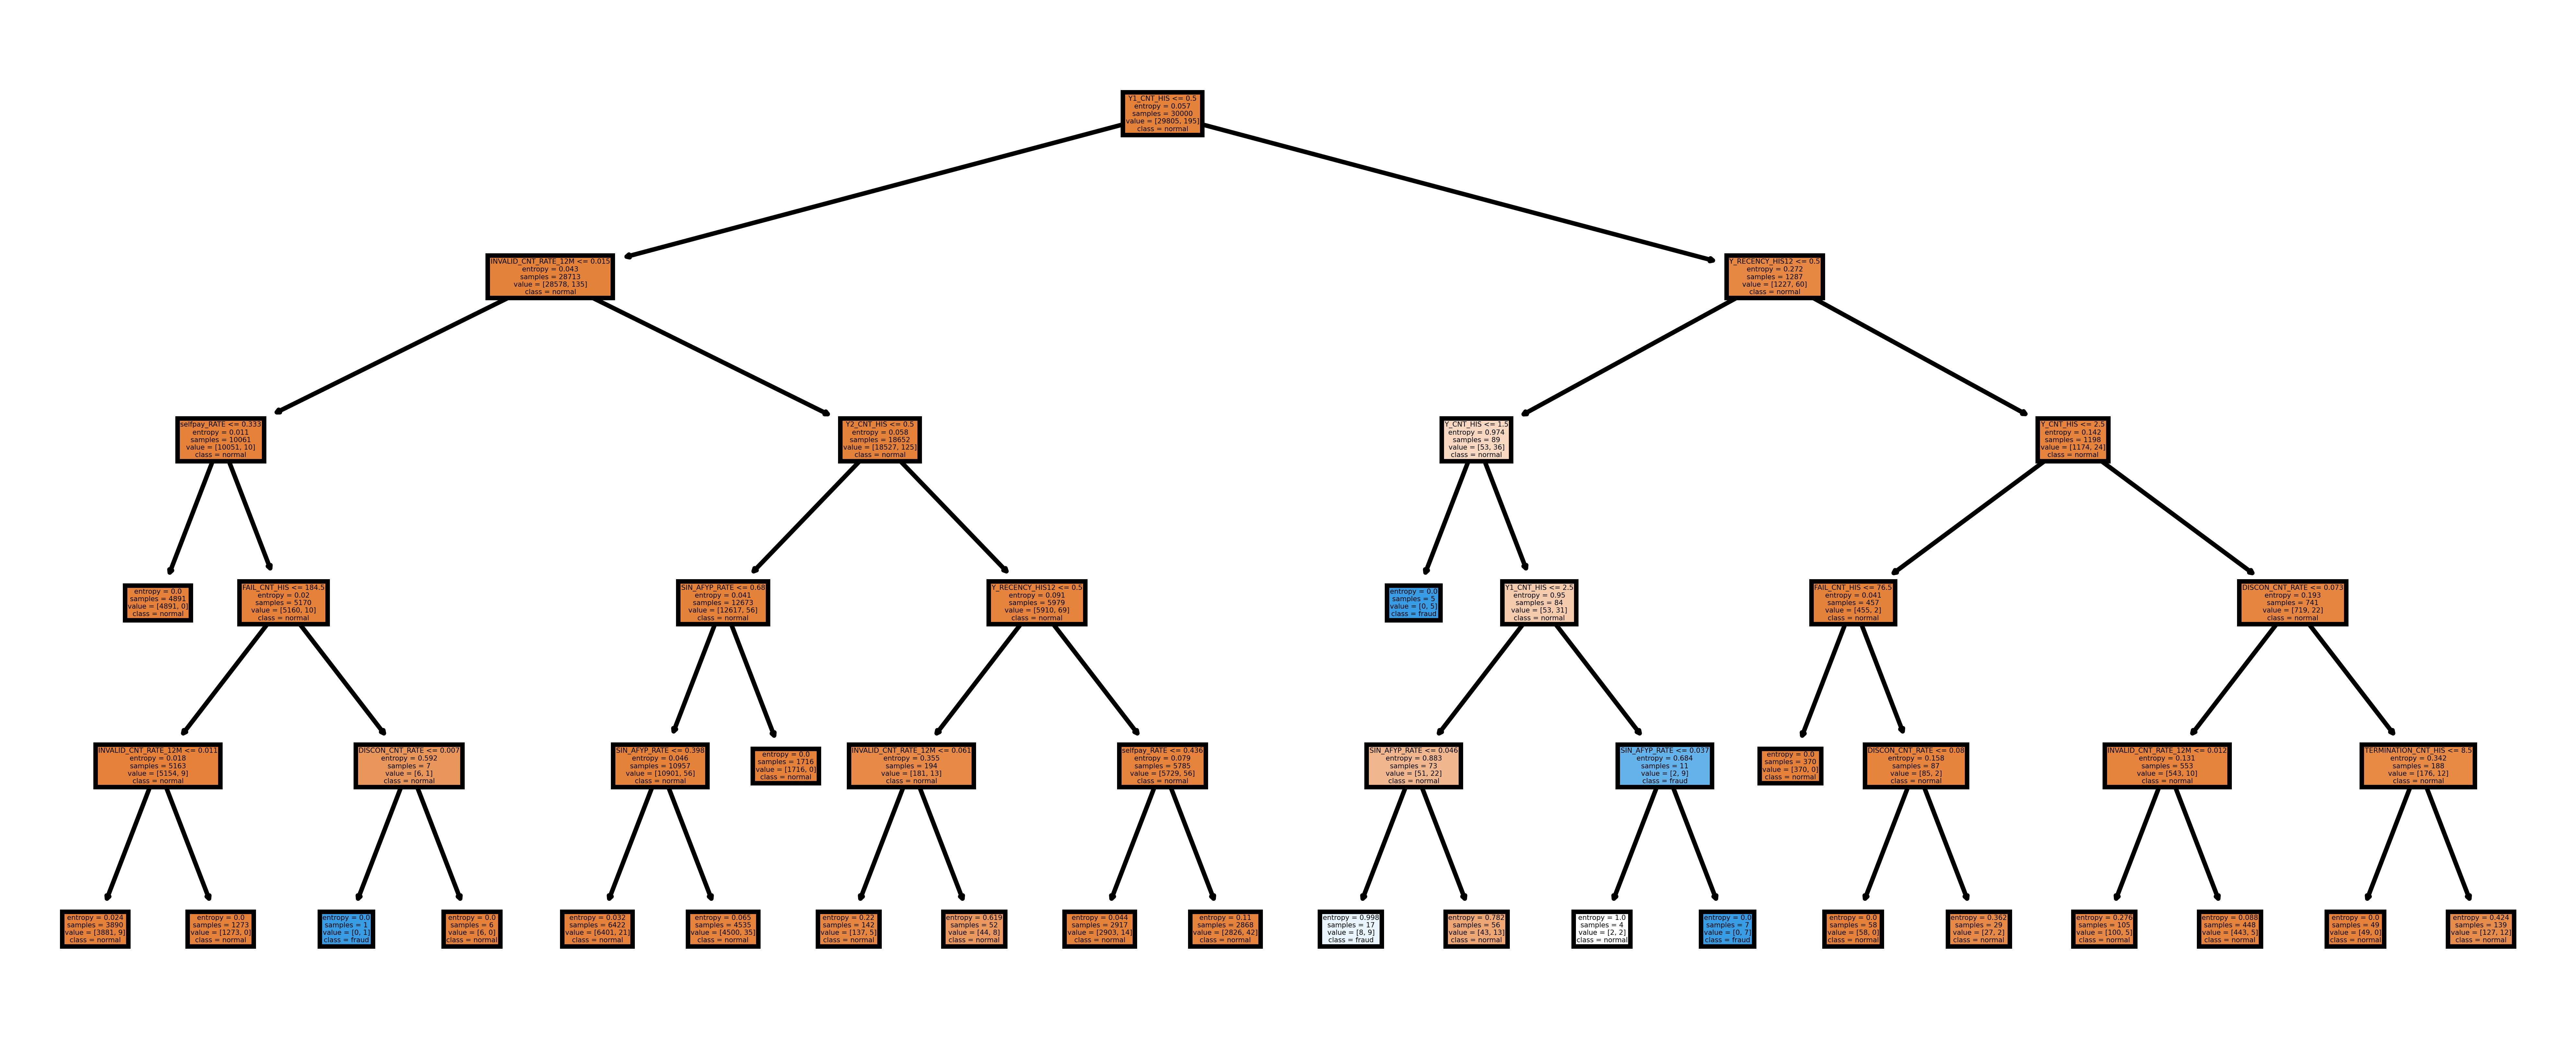

In [35]:
#繪製樹狀圖
from sklearn import tree
fn=important_features
cn=['normal','fraud']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=1000)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename_GDBT.png')

In [30]:
x_train = x_train[important_features] 

In [32]:
x_train 

,Y1_CNT_HIS,INVALID_CNT_RATE_12M,POL_RATE_0M,total_aum,AVG_AFYP_AH,SIN_AFYP_RATE,Y2_CNT_HIS,ADDRESS_2_CUST_RATE,RELATION_POL_CNT,selfpay_RATE
0,0,0.0095,0.0000,709905,16321,0.6230,1,0.1765,25,0.4015
1,0,0.0587,4.0000,626868,13515,0.6156,0,0.1813,9,0.4387
2,0,0.0362,1.0000,1122655,15439,0.7265,0,0.2240,12,0.4289
3,0,0.0000,1.7500,1064130,16031,0.0000,0,0.0870,16,0.4651
4,0,0.0199,8.0000,895450,23649,0.7127,0,0.2609,30,0.2064
...,...,...,...,...,...,...,...,...,...,...
29995,0,0.0532,1.0000,270673,17644,0.6404,1,0.2025,18,0.4739
29996,0,0.0245,1.0000,738000,16653,0.3579,0,0.3103,10,0.4093
29997,0,0.1091,0.0000,536947,25502,0.4263,0,0.1111,4,0.2130
29998,0,0.0318,-0.7143,5480513,16859,0.2383,1,0.1598,42,0.2741
